In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project course 1/laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1263.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.025970,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.428266,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


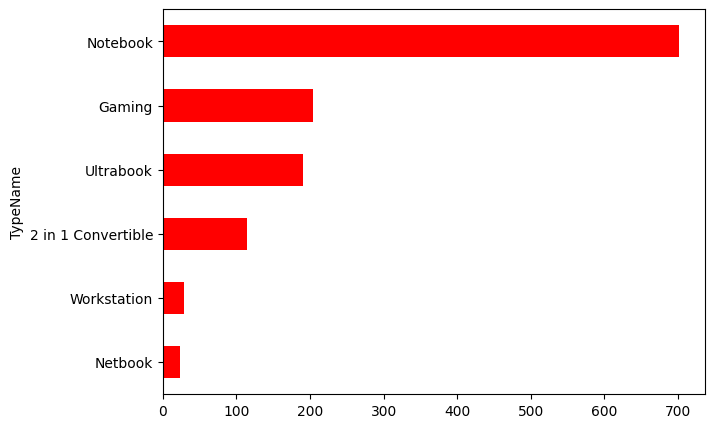

In [ ]:
plt.figure(figsize=(7,5))
df.groupby('TypeName').size().sort_values().plot.barh(color='red')
plt.show()

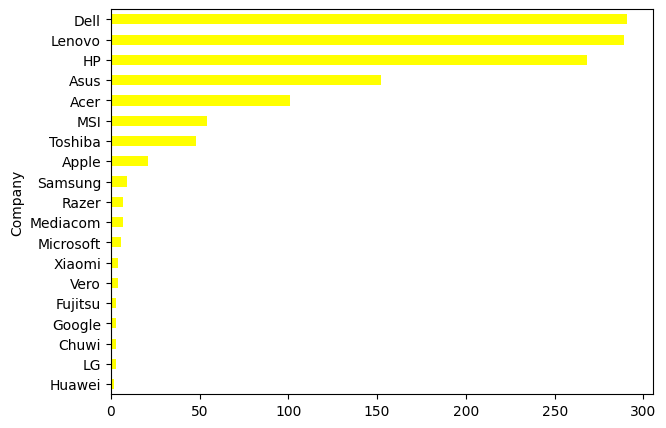

In [ ]:


plt.figure(figsize=(7,5))
df.groupby('Company').size().sort_values().plot.barh(color='yellow')
plt.show()



In [ ]:
avg_price_per_brand = df.groupby('Company')['Price_euros'].mean()
print("\nAverage Price of Laptops for Each Brand:")
print(avg_price_per_brand)


Average Price of Laptops for Each Brand:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


In [ ]:
highest_avg_price_brand = avg_price_per_brand.idxmax()
lowest_avg_price_brand = avg_price_per_brand.idxmin()
print(f"Brand with Highest Average Price: {highest_avg_price_brand}")
print(f"Brand with Lowest Average Price: {lowest_avg_price_brand}")

Brand with Highest Average Price: Razer
Brand with Lowest Average Price: Vero


In [ ]:
correlation_features = ['Price_euros', 'CPU_freq', 'Ram', 'Inches', 'Weight']
correlation_matrix = df[correlation_features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Price_euros  CPU_freq       Ram    Inches    Weight
Price_euros     1.000000  0.428847  0.740287  0.070091  0.211883
CPU_freq        0.428847  1.000000  0.366254  0.303115  0.318649
Ram             0.740287  0.366254  1.000000  0.245009  0.389370
Inches          0.070091  0.303115  0.245009  1.000000  0.827339
Weight          0.211883  0.318649  0.389370  0.827339  1.000000


In [ ]:
#Create a new feature 'StorageTotal' by summing PrimaryStorage and SecondaryStorage
df['StorageTotal'] = df['PrimaryStorage'] + df['SecondaryStorage']
print("\nNew Feature 'StorageTotal' Created:")
print(df[['PrimaryStorage', 'SecondaryStorage', 'StorageTotal']].head())


New Feature 'StorageTotal' Created:
   PrimaryStorage  SecondaryStorage  StorageTotal
0             128                 0           128
1             128                 0           128
2             256                 0           256
3             512                 0           512
4             256                 0           256


In [ ]:
#Now best fit model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,12
Inches,12
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:

avg_inch=df['Inches'].mean()
df['Inches'].fillna(avg_inch,inplace=True)

In [ ]:
df.drop('Touchscreen',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,12
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
df['CPU_model'].unique()


array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', nan,
       'Core M m3', 'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
     

In [ ]:
mode_list=df['TypeName'].mode()
mode=mode_list[0]
df['TypeName'].fillna(mode,inplace=True)

In [ ]:
df.replace({'TypeName':{'Ultrabook':0, 'Notebook':1, 'Netbook':2, 'Gaming':3, '2 in 1 Convertible':4,'Workstation':5},
           'Screen':{'Standard':0, 'Full HD':1, 'Quad HD+':2, '4K Ultra HD':3},
           'IPSpanel':{'Yes':1, 'No':0},
           'Touchscreen':{'Yes':1, 'No':0},
          'OS':{'macOS':0, 'No OS':1, 'Windows 10':2, 'Mac OS X':3, 'Linux':4, 'Android':5,'Windows 10 S':6, 'Chrome OS':7, 'Windows 7':8},
           'GPU_company':{'Intel':0, 'AMD':1, 'Nvidia':2, 'ARM':3},
           'CPU_company':{'Intel':0, 'AMD':1, 'Samsung':2},
            'RetinaDisplay':{'Yes':1, 'No':0},
            'PrimaryStorageType':{'SSD':0, 'Flash Storage':1, 'HDD':2, 'Hybrid':3},
            'TypeName':{'Ultrabook':0, 'Notebook':1, 'Netbook':2, 'Gaming':3, '2 in 1 Convertible':4,'Workstation':5}},







           inplace=True)

In [ ]:
most_frequent_value = df['CPU_model'].mode()[0]
df['CPU_model'] = df['CPU_model'].fillna(most_frequent_value)

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
#  Build a regression model to predict Price_euros
# Selecting features
X = df[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_company']]
y = df['Price_euros']



In [ ]:
# Encoding categorical variable GPU_company
from sklearn.preprocessing import LabelEncoder
X['GPU_company'] = LabelEncoder().fit_transform(X['GPU_company'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),

}



<ipython-input-48-6079cced298d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GPU_company'] = LabelEncoder().fit_transform(X['GPU_company'])


In [ ]:
#train korlam
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "MSE": mse,
        "R² Score": r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Score', ascending=False)
print("\nRegression Model Results:")
print(results_df)



Regression Model Results:
               Model            MSE  R² Score
2  Gradient Boosting   94359.056498  0.809890
1      Random Forest  105461.147171  0.787522
0  Linear Regression  168531.446891  0.660451


In [ ]:

#Create a classification model to predict the laptop type (TypeName)
X_class = df[['Inches', 'Ram', 'PrimaryStorage', 'Weight']]
y_class = df['TypeName']

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_class_train=scaler.fit_transform(X_class_train)
X_class_test=scaler.transform(X_class_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Tuning Decision Tree Classifier
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter':['best','random'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
}

grid_search_dt =RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_class_train, y_class_train)


print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_depth': None, 'criterion': 'entropy'}
Best Accuracy for Decision Tree: 0.7529411764705882


In [ ]:
# Tuning Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
param_grid_rf = {
   'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

grid_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_class_train, y_class_train)


print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Accuracy for Random Forest: 0.7735294117647058


In [ ]:
classification_models = {
    "Decision Tree": DecisionTreeClassifier(splitter='best', min_samples_split= 5, min_samples_leaf=4, min_impurity_decrease=0.01, max_depth= None, criterion='entropy'),
    "Random Forest": RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None),

}

In [ ]:

classification_results = []
for model_name, model in classification_models.items():
    model.fit(X_class_train, y_class_train)
    y_class_pred = model.predict(X_class_test)
    accuracy = accuracy_score(y_class_test, y_class_pred)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_class_test, y_class_pred))
    classification_results.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

classification_results_df = pd.DataFrame(classification_results)
classification_results_df = classification_results_df.sort_values(by='Accuracy', ascending=False)
print("\nClassification Model Results:")
print(classification_results_df)


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        33
           1       0.80      0.87      0.83       141
           2       0.50      0.75      0.60         4
           3       0.70      0.81      0.75        43
           4       0.67      0.14      0.24        28
           5       0.00      0.00      0.00         6

    accuracy                           0.75       255
   macro avg       0.55      0.56      0.52       255
weighted avg       0.72      0.75      0.71       255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71        33
           1       0.84      0.83      0.83       141
           2       1.00      0.50      0.67         4
           3       0.71      0.84      0.77        43
           4       0.53      0.29      0.37        28
           5       0.00      0.00      0.00         6

    accuracy                           0.75       255
   macro avg       0.62      0.55      0.56       255
weighted avg       0.74      0.75      0.73       255


Classification Model Results:
           Model  Accuracy
0  Decision Tree  0.745098
1  Random Forest  0.745098
